# Lab 3: Exploratory Data Analysis (EDA)
**Student Name:** Maria
**Course:** ARTI 308 - Machine Learning
**Topic:** Mental Health in Tech Survey

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mental_health.csv')

## 1. Checking Data Structure
In this step, we explore the shape, columns, and basic statistics of the dataset.

In [2]:
# Check shape and basic info
print("Dataset Shape:", df.shape)
print("\n--- Data Info ---")
df.info()

print("\n--- Statistical Summary ---")
print(df.describe())

Dataset Shape: (1259, 27)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options      

## 2. Data Cleaning
We will handle missing values, remove duplicates, and clean the 'Age' column.

In [3]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Handling missing values: Filling 'self_employed' with 'Unknown'
df['self_employed'] = df['self_employed'].fillna('Unknown')

# Cleaning Age: Keeping ages only between 18 and 75
df = df[(df['Age'] >= 18) & (df['Age'] <= 75)]
print("\nData cleaning completed.")

Missing values per column:
 Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Data cleaning completed.


## 3. Data Visualization and Pattern Discovery
Creating charts to find insights within the data.

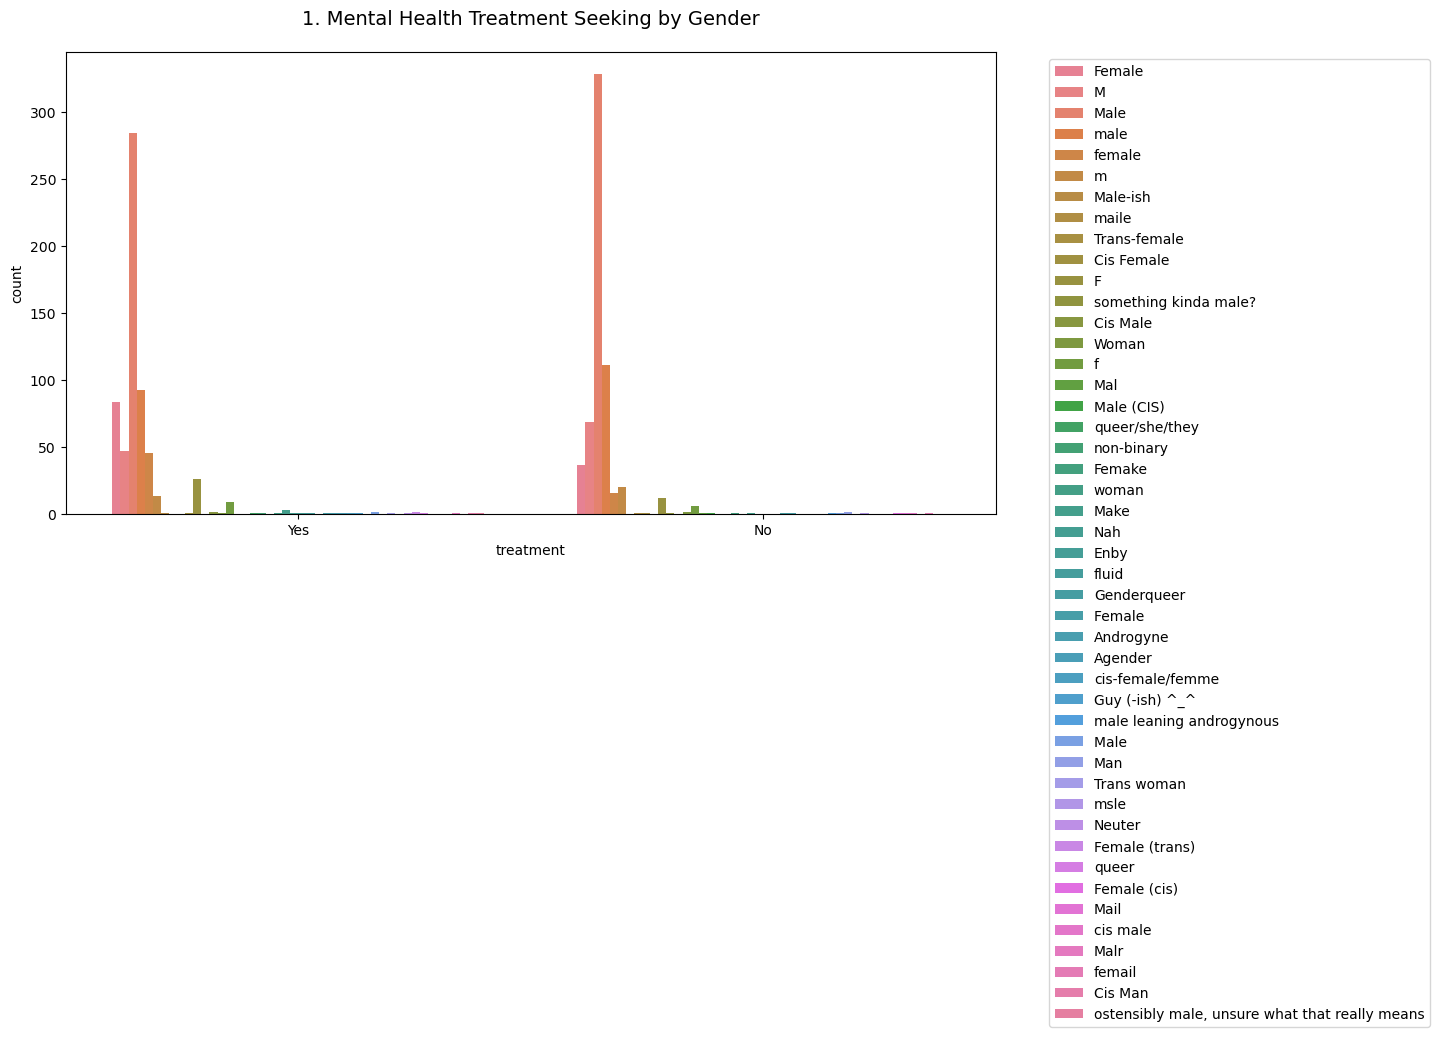

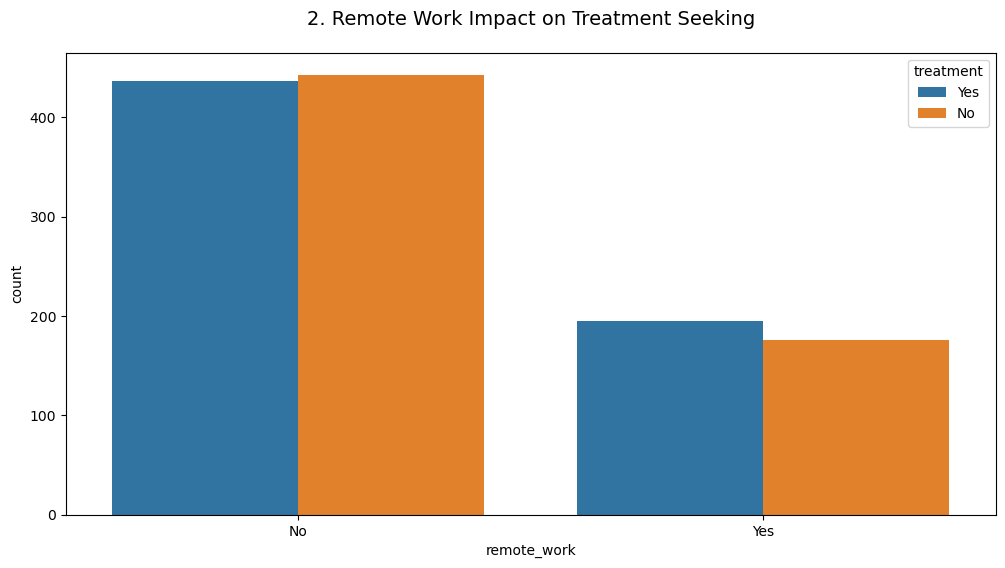

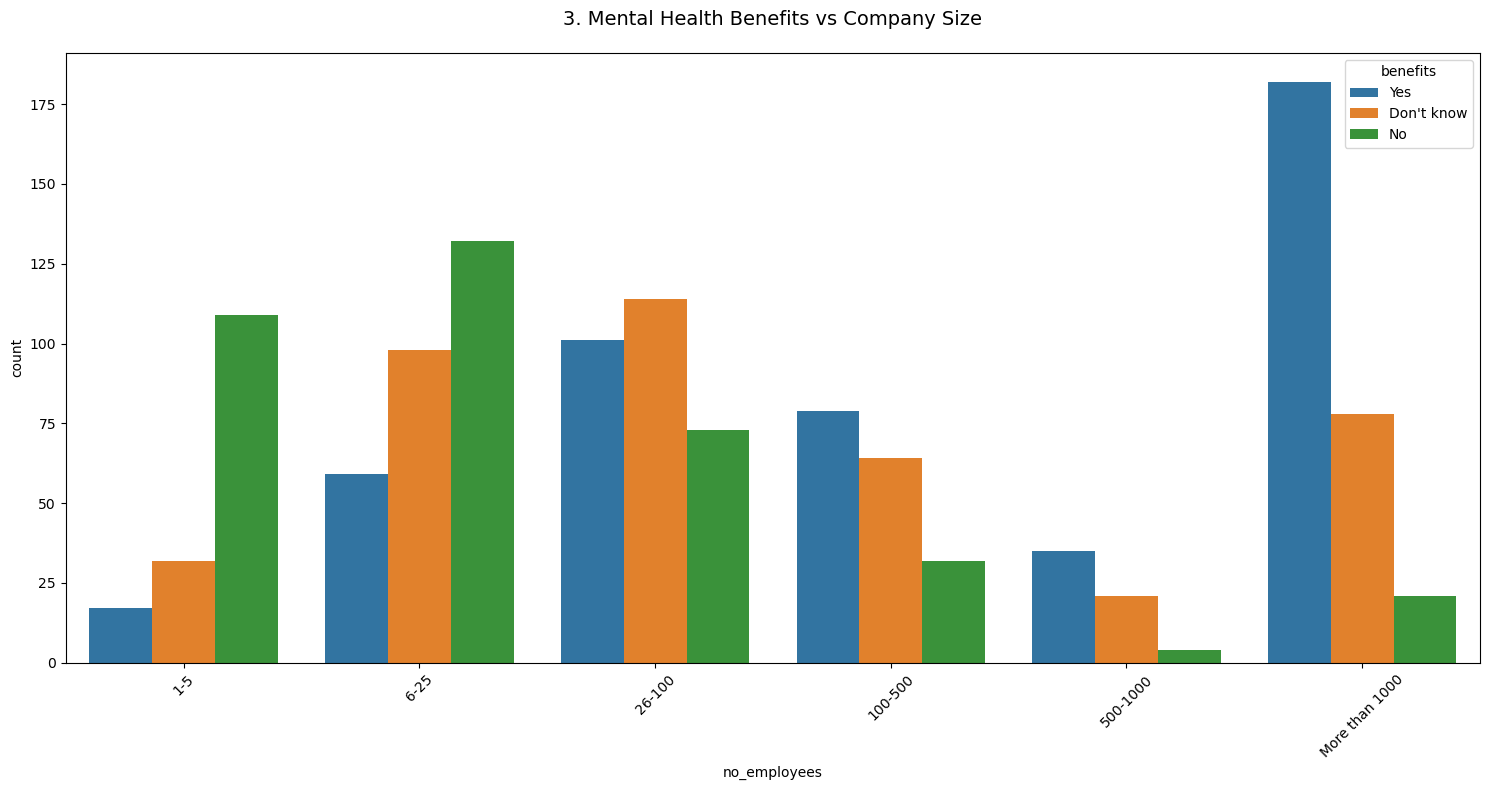

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. First Plot: Treatment by Gender
plt.figure(figsize=(12, 6)) # Create a wide space
sns.countplot(data=df, x='treatment', hue='Gender')
plt.title('1. Mental Health Treatment Seeking by Gender', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside to save space
plt.show() # Force this plot to end and display

print("\n" * 3) # Add 3 empty lines for visual separation in the notebook

# 2. Second Plot: Remote Work vs Treatment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title('2. Remote Work Impact on Treatment Seeking', fontsize=14, pad=20)
plt.show()

print("\n" * 3) # Add 3 empty lines again

# 3. Third Plot: Benefits by Company Size (The longest one)
plt.figure(figsize=(15, 8)) # Give it more width and height
sns.countplot(data=df, x='no_employees', hue='benefits', 
              order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
plt.title('3. Mental Health Benefits vs Company Size', fontsize=14, pad=20)
plt.xticks(rotation=45) # Rotate labels so they don't touch
plt.tight_layout() # Final polish
plt.show()


## 4. Final Insights
* **Insight 1:** Larger companies tend to provide more mental health benefits compared to smaller startups.
* **Insight 2:** There is a significant pattern in how different genders seek mental health treatment.
* **Insight 3:** The dataset required cleaning for the 'Age' column due to unrealistic values.